#OVerview
- Use the Central Limit Theorem to calculate the probability that a sample estimate  $\overline{X}$  is close to the population proportion  p .
- Run a Monte Carlo simulation to corroborate theoretical results built using probability theory.
- Estimate the spread based on estimates of  $\overline{X}$  and  $\hat{SE}(\overline{X})$ .
- Understand why bias can mean that larger sample sizes aren't necessarily better.

##1. The Central Limit Theorem in Practice


- Because  $\overline{X}$  is the sum of random draws divided by a constant, the distribution of  $\overline{X}$  is approximately normal.
- We can convert  $\overline{X}$  to a standard normal random variable  Z : $Z=\frac{\overline{X}-E(\overline{X})}{SE(\overline{X})}$
- The probability that  $\overline{X}$  is within .01 of the actual value of  $p$  is:
$Pr(Z\le\frac{0.01}{\sqrt{p(1-p)/N}}) - Pr(Z\le\frac{-0.01}{\sqrt{p(1-p)/N}})$ 
- The Central Limit Theorem (CLT) still works if  $\overline{X}$  is used in place of  $p$ . This is called a plug-in estimate. Hats over values denote estimates. Therefore:
$\hat{SE}(\overline{X})=\sqrt{\overline{X}(1-\overline{X})/N}$
- Using the CLT, the probability that  $\overline{X}$  is within .01 of the actual value of  $p$  is:
$Pr(Z\le\frac{0.01}{\sqrt{\overline{X}(1-\overline{X})/N}}) - Pr(Z\le\frac{-0.01}{\sqrt{\overline{X}(1-\overline{X})/N}})$

Code: Computing the probability of  $\overline{X}$  being within .01 of  $p$

In [1]:
X_hat <- 0.48
se <- sqrt(X_hat*(1-X_hat)/25)
pnorm(0.01/se) - pnorm(-0.01/se)

[1] 0.07971926

##2. Margin of Error

- The *margin of error* is defined as 2 times the standard error of the estimate  $\overline{X}$ .
- There is about a 95% chance that  $\overline{X}  will be within two standard errors of the actual parameter  p .

##3. A Monte Carlo Simulation for the CLT

- We can run Monte Carlo simulations to compare with theoretical results assuming a value of  $p$ .
- In practice,  $p$  is unknown. We can corroborate theoretical results by running Monte Carlo simulations with one or several values of  $p$ .
- One practical choice for  $p$  when modeling is $\overline{X}$  , the observed value of  $\hat{X}$  in a sample.

Code: Monte Carlo simulation using a set value of p

In [5]:
p <- 0.45    # unknown p to estimate
N <- 1000

# simulate one poll of size N and determine x_hat
x <- sample(c(0,1), size = N, replace = TRUE, prob = c(1-p, p))
x_hat <- mean(x)

# simulate B polls of size N and determine average x_hat
B <- 10000   # number of replicates
N <- 1000    # sample size per replicate
#0 : 1-p
#1: p
#N is number of already get
x_hat <- replicate(B, {
    x <- sample(c(0,1), size = N, replace = TRUE, prob = c(1-p, p))
    mean(x)
})

Code: Histogram and QQ-plot of Monte Carlo results

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



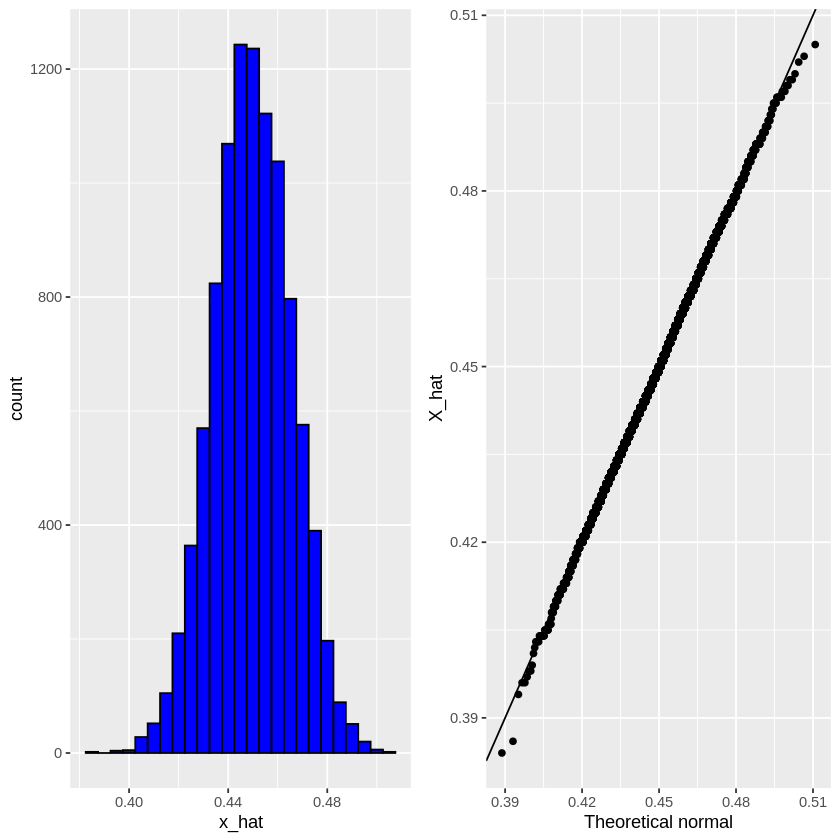

In [13]:
install.packages("gridExtra")
library(tidyverse)
library(gridExtra)
#convert to frame
p1 <- data.frame(x_hat = x_hat) %>%
    ggplot(aes(x_hat)) +
    geom_histogram(binwidth = 0.005, color = "black",fill="blue")
p2 <- data.frame(x_hat = x_hat) %>%
    ggplot(aes(sample = x_hat)) +
    stat_qq(dparams = list(mean = mean(x_hat), sd = sd(x_hat))) +
    geom_abline() +
    ylab("X_hat") +
    xlab("Theoretical normal")
grid.arrange(p1, p2, nrow=1)

##4. The Spread

- The spread between two outcomes with probabilities  $p$  and  $1−p$  is  $2p−1$ .
- The expected value of the spread is  $2\overline{X}−1$ .
- The standard error of the spread is  $2\hat{SE}(\overline{X})$.
- The margin of error of the spread is 2 times the margin of error of  $\overline{X}$ .

##5. Bias: Why Not Run a Very Large Poll?

- An extremely large poll would theoretically be able to predict election results almost perfectly.
- These sample sizes are not practical. In addition to cost concerns, polling doesn't reach everyone in the population (eventual voters) with equal probability, and it also may include data from outside our population (people who will not end up voting).
- These systematic errors in polling are called bias. We will learn more about bias in the future.

Code: Plotting margin of error in an extremely large poll over a range of values of p

,p,SE
,<dbl>,<dbl>
1,0.3500000,0.003016621
2,0.3530303,0.003022581
3,0.3560606,0.003028408
4,0.3590909,0.003034104
5,0.3621212,0.003039667
6,0.3651515,0.003045100


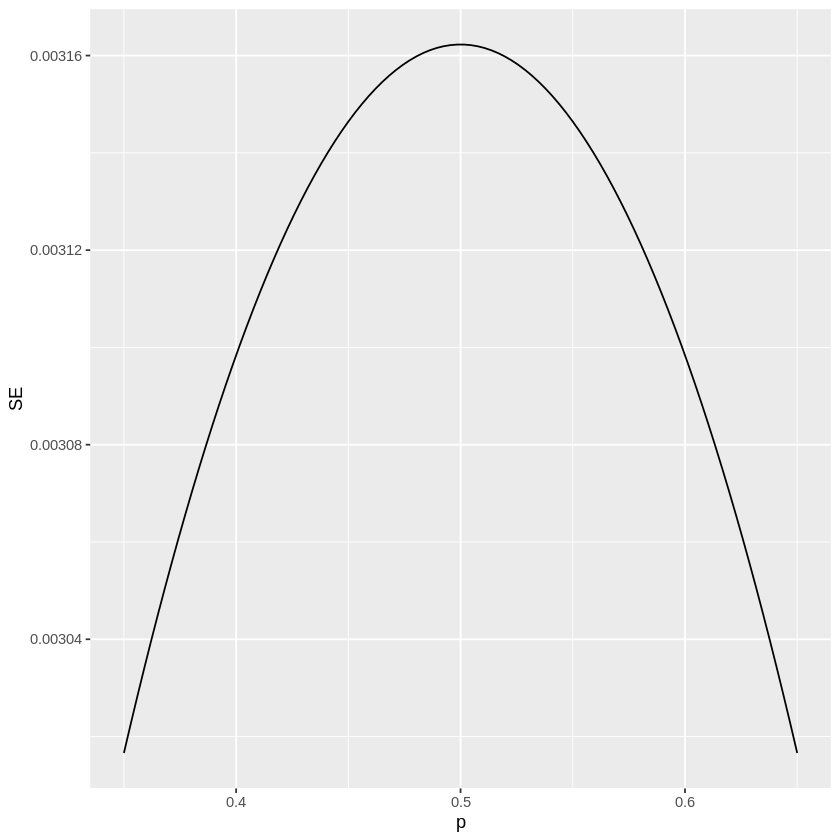

In [16]:
library(tidyverse)
N <- 100000
p <- seq(0.35, 0.65, length = 100)
SE <- sapply(p, function(x) 2*sqrt(x*(1-x)/N))
head(data.frame(p = p, SE = SE))
data.frame(p = p, SE = SE) %>%
    ggplot(aes(p, SE)) +
    geom_line()

#Assessment

Exercise 1. Sample average

Write function called take_sample that takes the proportion of Democrats p and the sample size N as arguments and returns the sample average of Democrats (1) and Republicans (0).

Calculate the sample average if the proportion of Democrats equals 0.45 and the sample size is 100.

In [18]:
# Write a function called `take_sample` that takes `p` and `N` as arguements and returns the average value of a randomly sampled population.
take_sample <- function(p, N){
    X <- sample(c(0,1), size = N, replace = TRUE, prob = c(1 - p, p))
    mean(X)
}

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# Call the `take_sample` function to determine the sample average of `N` randomly selected people from a population containing a proportion of Democrats equal to `p`. Print this value to the console.

take_sample(p,N)

[1] 0.46

Exercise 2. Distribution of errors (1)

Assume the proportion of Democrats in the population $p$ equals 0.45 and that your sample size $N$ is 100 polled voters. The take_sample function you defined previously generates our estimate,$\overline{X}$ 
.

Replicate the random sampling 10,000 times and calculate $p-\overline{X}$
 for each random sample. Save these differences as a vector called errors. Find the average of errors and plot a histogram of the distribution.

In [19]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Create an objected called `errors` that replicates subtracting the result of the `take_sample` function from `p` for `B` replications
errors <- replicate(B, p - take_sample(p, N))

# Calculate the mean of the errors. Print this value to the console.
mean(errors)


[1] -4.9e-05

Exercise 3. Distribution of errors(2)

In the last exercise, you made a vector of differences between the actual value for $p$ and an estimate, $\overline{X}$
. We called these differences between the actual and estimated values errors.

The errors object has already been loaded for you. Use the hist function to plot a histogram of the values contained in the vector errors. Which statement best describes the distribution of the errors?

The errors are symmetrically distributed around 0.

Exercise 4. Average size of error 

The error $p-\overline{X}$
 is a random variable. In practice, the error is not observed because we do not know the actual proportion of Democratic voters, $p$ . However, we can describe the size of the error by constructing a simulation.

What is the average size of the error if we define the size by taking the absolute value $|p-\overline{X}|$
 ?

In [20]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# We generated `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Calculate the mean of the absolute value of each simulated error. Print this value to the console.
mean(abs(errors))


[1] 0.039267

Exercise 5. Standard deviation of the spread

The standard error is related to the typical size of the error we make when predicting. We say size because, as we just saw, the errors are centered around 0. In that sense, the typical error is 0. For mathematical reasons related to the central limit theorem, we actually use the standard deviation of errors rather than the average of the absolute values.

As we have discussed, the standard error is the square root of the average squared distance $(p-\overline{X})^{2}$
. The standard deviation is defined as the square root of the distance squared.

Calculate the standard deviation of the spread.

In [21]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# We generated `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Calculate the standard deviation of `errors`
sqrt(mean(errors^2))


[1] 0.04949939

Exercise 6. Estimating the standard error

The theory we just learned tells us what this standard deviation is going to be because it is the standard error of $\overline{X}$
.

Estimate the standard error given an expected value of 0.45 and a sample size of 100.

In [22]:
# Define `p` as the expected value equal to 0.45
p <- 0.45

# Define `N` as the sample size
N <- 100

# Calculate the standard error
sqrt(p*(1-p)/N)


[1] 0.04974937

Exercise 7. Standard error of the estimate

In practice, we don't know $p$, so we construct an estimate of the theoretical prediction based by plugging in $\overline{X}$
 for $p$. Calculate the standard error of the estimate: $\hat{SE}(\overline{X})$


In [23]:
# Define `p` as a proportion of Democratic voters to simulate
p <- 0.45

# Define `N` as the sample size
N <- 100

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `X` as a random sample of `N` voters with a probability of picking a Democrat ('1') equal to `p`
X <- sample(0:1, N, replace=T, p=c(1-p,p))

# Define `X_bar` as the average sampled proportion
X_bar <- mean(X)


# Calculate the standard error of the estimate. Print the result to the console.
sqrt(X_bar*(1-X_bar)/N)


[1] 0.04983974

Exercise 8. Plotting the standard error

The standard error estimates obtained from the Monte Carlo simulation, the theoretical prediction, and the estimate of the theoretical prediction are all very close, which tells us that the theory is working. This gives us a practical approach to knowing the typical error we will make if we predict  $p$ with  $\overline{X}$
. The theoretical result gives us an idea of how large a sample size is required to obtain the precision we need. Earlier we learned that the largest standard errors occur for $p=0.5$.

Create a plot of the largest standard error for $N$  ranging from 100 to 5,000. Based on this plot, how large does the sample size have to be to have a standard error of about 1%?

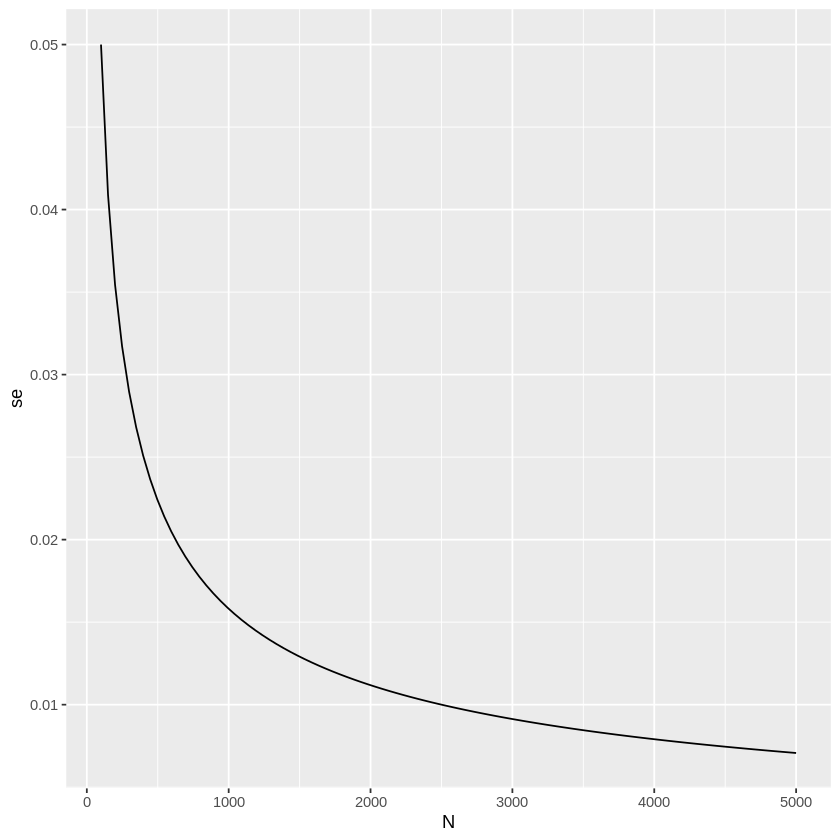

In [27]:
N <- seq(100, 5000, len = 100)
p <- 0.5
se <- sqrt(p*(1-p)/N)
data.frame(N = N, se = se) %>%
    ggplot(aes(N, se)) +
    geom_line()


=> N = 2500 then standar err is 1%

Exercise 9. Distribution of X-hat
For N, the central limit theorem tells us that the distribution of $\overline{X}$
 is...


approximately normal with expected value $p$ and standard error : $\sqrt{\frac{p(1-p)}{N}}$

Exercise 10. Distribution of the errors

We calculated a vector errors that contained, for each simulated sample, the difference between the actual value $p$  and our estimate $\overline{X}$
.

The errors $\overline{X}-p$
 are:

approximately normal with expected value 0 and standard error : $\sqrt{\frac{p(1-p)}{N}}$

Exercise 11. Plotting the errors

Make a qq-plot of the errors you generated previously to see if they follow a normal distribution.

- Run the supplied code
- Use the $qqnorm$ function to produce a qq-plot of the errors.
- Use the $qqline$ function to plot a line showing a normal distribution.

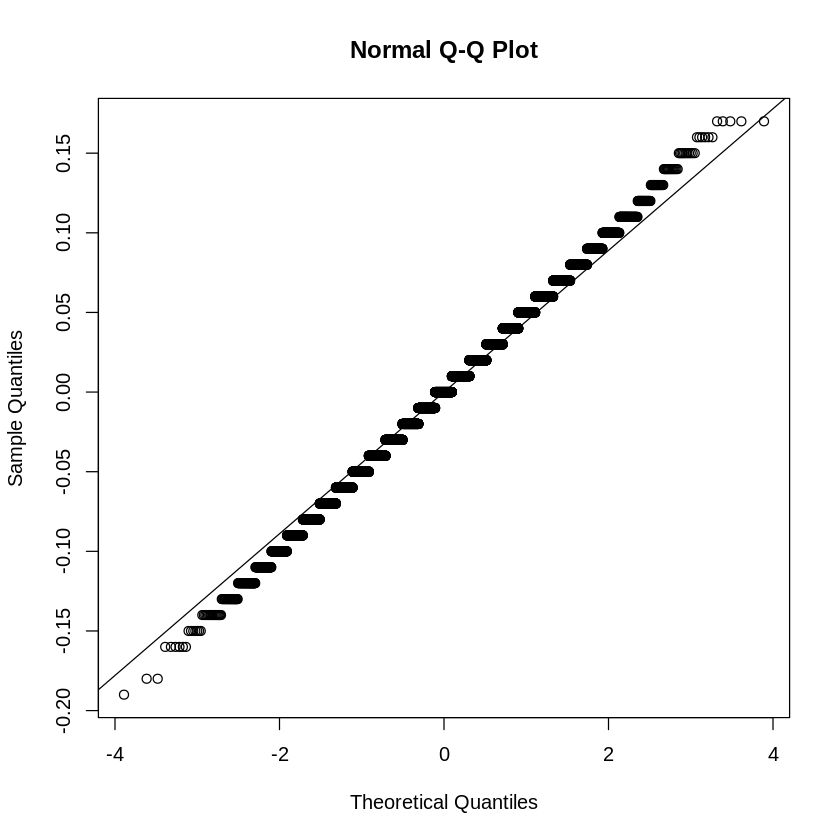

In [28]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Generate `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Generate a qq-plot of `errors` with a qq-line showing a normal distribution
qqnorm(errors)
qqline(errors)


Exercise 12. Estimating the probability of a specific value of X-bar

If $p=0.45$ and $N=100$, use the central limit theorem to estimate the probability that $\overline{X} >0.5$
.

In [29]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# Calculate the probability that the estimated proportion of Democrats in the population is greater than 0.5. Print this value to the console.
1-pnorm(0.5,p,sd=sqrt(p*(1-p)/N))



[1] 0.1574393

Exercise 13. Estimating the probability of a specific error size

Assume you are in a practical situation and you don't know $p$. Take a sample of size $N=100$ and obtain a sample average of $\overline{X}=0.51$
.

What is the CLT approximation for the probability that your error size is equal or larger than 0.01?

In [30]:
# Define `N` as the number of people polled
N <-100

# Define `X_hat` as the sample average
X_hat <- 0.51

# Define `se_hat` as the standard error of the sample average
se_hat <- sqrt(X_hat*(1-X_hat)/N)

# Calculate the probability that the error is 0.01 or larger
1 - pnorm(.01, 0, se_hat) + pnorm(-0.01, 0, se_hat)


[1] 0.8414493